# Name of Projects:
Agricultural production optimization Engine.

## Problem Statement:
Build a Predictive Model so as to suggest the most suitable crops to grow based on the available climatic and soil conditions.

## Goal:
    Achieve precision farming by optimizing the agriculture production.

In [1]:
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('Agriculture.csv') # lets read the dataset

In [3]:
data.head() #lets check the head of dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.shape #lets check the shape of data

(2200, 8)

In [5]:
data.isnull().sum() # lets check the missing value

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
# lets check the summary for all the crops

print("Average Ratio of Nitrogen in the soil: {0:2f}".format(data['N'].mean()))
print("Average Ratio of Phosphorus in the soil: {0:2f}".format(data['P'].mean()))
print("Average Ratio of Potassium in the soil: {0:2f}".format(data['K'].mean()))
print("Average Temperature in Celsius soil: {0:2f}".format(data['temperature'].mean()))
print("Average relative Humidity in %: {0:2f}".format(data['humidity'].mean()))
print("Average PH value in the soil: {0:2f}".format(data['ph'].mean()))
print("Average Ratio of Rainfall in the mm: {0:2f}".format(data['rainfall'].mean()))

Average Ratio of Nitrogen in the soil: 50.551818
Average Ratio of Phosphorus in the soil: 53.362727
Average Ratio of Potassium in the soil: 48.149091
Average Temperature in Celsius soil: 25.616244
Average relative Humidity in %: 71.481779
Average PH value in the soil: 6.469480
Average Ratio of Rainfall in the mm: 103.463655


according to result  we can see the average of N,P,K  average is approximsate 50% and that is the need for crop in scintific prospect and ph arrount should be & and rain fall should be arround 100% for any crops


In [7]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [8]:
# lets check the sumary statistics for each of the crops

@interact
def summary (crops = list(data['label'].value_counts().index)):
    x= data[data['label']==crops]
    print(".....................................")
    print("Statics for Nitrogen")
    print("minimum Nitrogen required:",x["N"].min())
    print("minimum Nitrogen required:",x["N"].mean())
    print("minimum Nitrogen required:",x["N"].max())
    print(".....................................")
    print("Statics for Phosphorus")
    print("minimum Phosphorus required:",x["P"].min())
    print("minimum Phosphorus required:",x["P"].min())
    print("minimum Phosphorus required:",x["P"].min())
    print(".....................................")
    print("Statics for Potassium")
    print("minimum Potassium required:",x["K"].min())
    print("minimum Potassium required:",x["K"].min())
    print("minimum Potassium required:",x["K"].min())
    print(".....................................")
    print("Statics for Temperature")
    print("minimum Temperature required:",x["temperature"].min())
    print("minimum Temperature required:",x["temperature"].min())
    print("minimum Temperature required:",x["temperature"].min())
    print(".....................................")
    print("Statics for relative Humidity")
    print("minimum relative Humidity required:",x["humidity"].min())
    print("minimum relative Humidity required:",x["humidity"].min())
    print("minimum relative Humidity required:",x["humidity"].min())
    print(".....................................")
    print("Statics for  PH")
    print("minimum  PH required:",x["ph"].min())
    print("minimum  PH required:",x["ph"].min())
    print("minimum  PH required:",x["ph"].min())
    print(".....................................")
    print("Statics for Rainfall")
    print("minimum Rainfall required:",x["rainfall"].min())
    print("minimum Rainfall required:",x["rainfall"].min())
    print("minimum Rainfall required:",x["rainfall"].min())

interactive(children=(Dropdown(description='crops', options=('mothbeans', 'cotton', 'banana', 'orange', 'coffe…

In [9]:
## lets compare the average Requirement for each crops with average condition

@interact
def compare (conditions=['N','P','K','temperature','ph','humidity','rainfall']):
    print("Average Value for", conditions,"is {0:.2f}".format(data[conditions].mean()))
    print("...........................................")
    print("Rice : {0:.2f}".format (data[(data['label']== 'rice')][conditions].mean()))
    print("Lentil: {0:2f}".format (data[(data['label']=='lentil')][conditions].mean()))
    print("Blackgram: {0:2f}".format (data[(data['label']=='blackgram')][conditions].mean()))
    print("Papaya: {0:2f}".format (data[(data['label']=='papaya')][conditions].mean()))
    print("Mango: {0:2f}".format (data[(data['label']=='mango')][conditions].mean()))
    print("Coffee: {0:2f}".format (data[(data['label']=='coffee')][conditions].mean()))
    print("Watermelon: {0:2f}".format (data[(data['label']=='watermelon')][conditions].mean()))
    print("Mothbeans: {0:2f}".format (data[(data['label']=='mothbeans')][conditions].mean()))
    print("Muskmelon: {0:2f}".format (data[(data['label']=='muskmelon')][conditions].mean()))
    print("Maize: {0:2f}".format (data[(data['label']=='maize')][conditions].mean()))
    print("Kidneybeans: {0:2f}".format (data[(data['label']=='kidneybeans')][conditions].mean()))
    print("Banana: {0:2f}".format (data[(data['label']=='banana')][conditions].mean()))
    print("Mungbean: {0:2f}".format (data[(data['label']=='mungbean')][conditions].mean()))
    print("Pomegranate: {0:2f}".format (data[(data['label']=='pomegranate')][conditions].mean()))
    print("Grapes: {0:2f}".format (data[(data['label']=='grapes')][conditions].mean()))
    print("Jute: {0:2f}".format (data[(data['label']=='jute')][conditions].mean()))
    print("Pigeonpeas: {0:2f}".format (data[(data['label']=='pigeonpeas')][conditions].mean()))
    print("Orange: {0:2f}".format (data[(data['label']=='orange')][conditions].mean()))
    print("Cotton: {0:2f}".format (data[(data['label']=='cotton')][conditions].mean()))
    print("Apple: {0:2f}".format (data[(data['label']=='apple')][conditions].mean()))
    print("Chickpea: {0:2f}".format (data[(data['label']=='chickpea')][conditions].mean()))
    print("Coconut: {0:2f}".format (data[(data['label']=='coconut')][conditions].mean()))
  

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [10]:
#lets make this function more intutive
@interact
def compare (conditions=['N','P','K','temperature','ph','humidity','rainfall']):
    print ("Crop which required greater than average", conditions,'\n')
    print(data[data[conditions] > data[conditions].mean()]['label'].unique())
    print("...........................................")
    print ("Crop which required less than average", conditions,'\n')
    print(data[data[conditions]<= data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

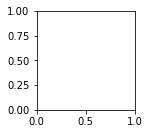

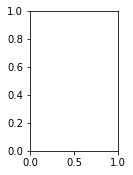

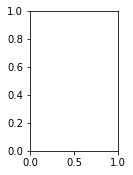

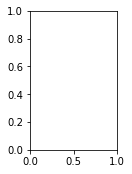

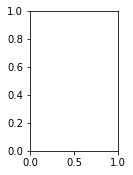

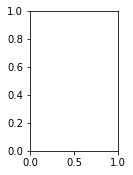

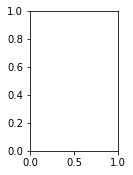

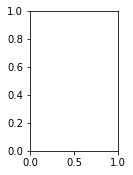

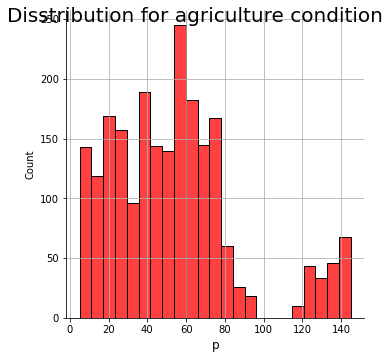

In [11]:
plt.subplot(2,3,4)
sns.displot(data['N'],color="black")
plt.xlabel('n',fontsize=12)
plt.grid()

plt.subplot(2,3,4)
sns.displot(data["K"],color="yellow")
plt.xlabel('k',fontsize=12)
plt.grid()


plt.subplot(2,3,4)
sns.displot(data["temperature"],color="grey")
plt.xlabel('Temperature',fontsize=12)
plt.grid()


plt.subplot(2,3,4)
sns.displot(data["humidity"],color="lightgreen")
plt.xlabel('Humidity',fontsize=12)
plt.grid()


plt.subplot(2,3,4)
sns.displot(data["rainfall"],color="darkgreen")
plt.xlabel('Rainfall',fontsize=12)
plt.grid()


plt.subplot(2,3,4)
sns.displot(data["label"],color="blue")
plt.xlabel('Label',fontsize=12)
plt.grid()


plt.subplot(2,3,4)
sns.displot(data["ph"],color="darkblue")
plt.xlabel('Ph',fontsize=12)
plt.grid()



plt.subplot(2,3,4)
sns.displot(data["P"],color="red")
plt.xlabel('p',fontsize=12)
plt.grid()

plt.suptitle("Disstribution for agriculture condition", fontsize=20)
plt.show()


In [12]:
data['label'].value_counts() #lets check the crops present in this Dataset

mothbeans      100
cotton         100
banana         100
orange         100
coffee         100
grapes         100
pigeonpeas     100
blackgram      100
watermelon     100
coconut        100
rice           100
chickpea       100
papaya         100
mungbean       100
maize          100
lentil         100
apple          100
kidneybeans    100
mango          100
pomegranate    100
muskmelon      100
jute           100
Name: label, dtype: int64

In [13]:
print("some interesting pattern")
print("...........................")
print("crop which required very high ratio of Nitrogen content in soil:",data[data['N'] > 120]['label'].unique())
print("crop which required very high ratio of Phosphorous content in soil:",data[data['P'] >100]['label'].unique())
print("crop which required very high ratio of Potassium content in soil:",data[data['K'] >200]['label'].unique())
print("crop which required very high ratio of rainfall: ",data[data["rainfall"]>200]['label'].unique())
print("crop which required very high  temperature :",data[data["temperature"]> 40]['label'].unique())
print("crop which required very low temperature :",data[data["temperature"] <10]['label'].unique())
print("crop which required very low  humidity :",data[data["humidity"] <20]['label'].unique())
print("crop which required very low  ph :",data[data["ph"] <4]['label'].unique())
print("crop which required very low  ph :",data[data["ph"] >9]['label'].unique())



some interesting pattern
...........................
crop which required very high ratio of Nitrogen content in soil: ['cotton']
crop which required very high ratio of Phosphorous content in soil: ['grapes' 'apple']
crop which required very high ratio of Potassium content in soil: ['grapes' 'apple']
crop which required very high ratio of rainfall:  ['rice' 'papaya' 'coconut']
crop which required very high  temperature : ['grapes' 'papaya']
crop which required very low temperature : ['grapes']
crop which required very low  humidity : ['chickpea' 'kidneybeans']
crop which required very low  ph : ['mothbeans']
crop which required very low  ph : ['mothbeans']


In [14]:
###lets understand which crop can be grown in summer,winter,rainy seasons
print("Summer Crops")
print(data[(data['temperature']> 30) & (data['humidity'] > 50)]['label'].unique())

print("..............................")
print("winter crop")
print(data[(data["temperature"]> 20) & (data["humidity"] > 30)]['label'].unique())

print("..............................")
print("rainy crop")          
print(data[(data["rainfall"]> 200) & (data["humidity"] > 30)]['label'].unique())
           


Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
..............................
winter crop
['rice' 'maize' 'pigeonpeas' 'mothbeans' 'mungbean' 'blackgram' 'lentil'
 'pomegranate' 'banana' 'mango' 'grapes' 'watermelon' 'muskmelon' 'apple'
 'orange' 'papaya' 'coconut' 'cotton' 'jute' 'coffee']
..............................
rainy crop
['rice' 'papaya' 'coconut']


In [15]:
from sklearn.cluster import KMeans

In [18]:
x= data.drop(['label'],axis=1)

In [19]:
X=x.values

In [20]:
x.shape

(2200, 7)

In [21]:
#lets determine the optimum number of cluster within the dataset
plt.rcParams['figure.figsize']=(10,4)

wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i, init = 'k-means++',max_iter=300, n_init=10 , random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)

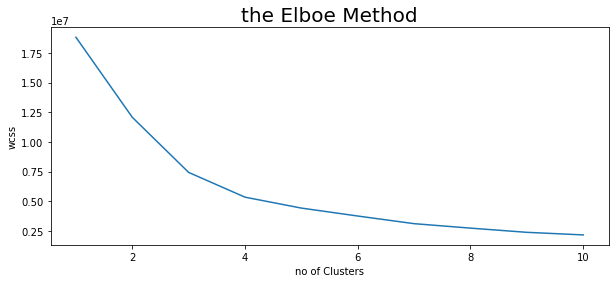

In [22]:
plt.plot(range(1,11),wcss)
plt.title('the Elboe Method', fontsize=20)
plt.xlabel('no of Clusters')
plt.ylabel('wcss')
plt.show()

In [23]:
#lets split the dataframe for prediction modeling

y=data['label']
x=data.drop(['label'],axis=1)



In [24]:
x.shape

(2200, 7)

In [25]:
y.shape

(2200,)

In [26]:
#lets creat trining and testing sets for validation of results

from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix

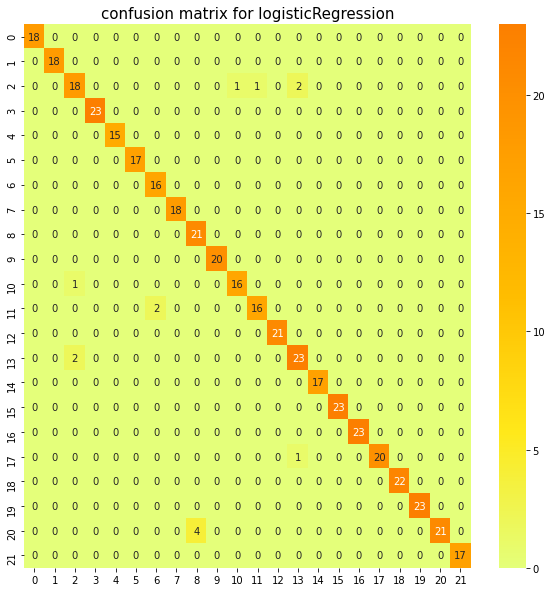

In [31]:
#lets print the confusion matrix first
plt.rcParams['figure.figsize']=(10,10)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Wistia')
plt.title('confusion matrix for logisticRegression', fontsize = 15)
plt.show()

In [32]:
#lets print the classification report also
cr=classification_report (y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [33]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [34]:
prediction= model.predict((np.array([[90,
                                     40,
                                     20,
                                     80,
                                     7,
                                     15,
                                      200]])))
print('the suggest crop for given climate condition is:' , prediction)

the suggest crop for given climate condition is: ['coffee']


from this model we can predict crops according to thecondition of the different feature value. so it is easier for the selection of best crops to farmer.

# 

# saving the model

In [35]:
import joblib
joblib.dump(model,"Agricultural.pkl")

['Agricultural.pkl']